In this checkpoint, we'll learn how to describe large datasets using summary statistics that give us a view of the central tendency and variance in datapoints across observed examples. Here are the concepts we'll cover:

* populations
* samples
* central tendency
* mean
* median
* mode
* bias
* variance
* standard deviation
* standard error
* generating summary statistics in Pandas

At the end of this checkpoint, you'll complete a challenge in which you conduct basic summary analysis of a dataset.


## Populations vs. samples

A major purpose of data science is to give us information about some group, known as a *population*. This population can be all the people living in a country, all the purchases made at a store, or any other unit from which information can be drawn. Often, it is difficult, prohibitively expensive, or simply impossible to get data from all members of a population. Imagine trying to get a questionnaire to every person in a country to learn about their product preferences- it can't be done!  

Instead, we *randomly* extract a subset from the population (a random group of people, a random selection of purchases), called a *sample*, that we can study in detail to learn about the population as a whole.

For example, imagine we have a 100 pound bag of M&Ms and we want to know the percentage of green M&Ms in the bag. The bag of M&Ms would be our population. While it would certainly be possible to count every single M&M, it would take a very long time, not to mention being potentially quite messy. As an alternative, we could shake up the bag, pour out half a pound of M&Ms, and count the M&Ms in that sample. If our half pound of M&Ms was 8% green, then it is pretty safe to say that the whole 100-pound bag is also 8% green M&Ms.

Statisticians take data about a sample and reduce the complexity of that data into understandable and accurate summaries, known as *statistics*. Statisticians use the **sample** statistics to infer information about the entire **population** from which the sample is taken.


## Measures of central tendency

Statistics can describe either an individual variable or the relationships among two or more variables. A *variable* represents information about a particular measurable concept (temperature, price, size, etc).  Each measurement within a variable is called a *datapoint*. Let's make a dataframe in Python with one variable, age, that we can play with later on.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Make a blank data frame.
df = pd.DataFrame()

# Populate it with data.
df['age'] = [28, 42, 27, 24, 35, 54, 35, 37]

The central tendency describes a point around which datapoints in a variable cluster. Central tendency can be measured in a number of ways.  The most common measures are the *mean* the *median*, and the *mode*.  


### Mean

The mean represents the average value within a variable, and is computed as the sum of the individual datapoints in a variable `x` divided by the total number of values in a variable `n`.  It is sometimes also referred to as the "expected value" of a variable.

```python
mean = sum(x) / n
```

Here are two ways you can compute the mean of our `age` data, first with built-in Python functionality and then with NumPy.

In [12]:
# Using built-in Python functionality.
sum(df['age']) / len(df['age'])

# Using NumPy
import numpy as np

np.mean(df['age'])

35.25

The mean is easy to understand and commonly used, but it's sensitive to extreme values: one abnormally large value in a set of otherwise small values will cause the mean to become much larger.


### Median

The *median* represents the middle value in a variable when the values are ordered from least to greatest. If there are an odd number of values in a variable, then the median is the middle value, and if there are an even number of values in a variable, the median represents the average of the two middlemost values.

Here's how you can compute the median of our `age` data using the `statistics` module of the Python standard library or NumPy.

In [13]:
# Vanilla Python, using the built-in statistics module.
import statistics

statistics.median(df['age'])

# Using NumPy.
import numpy as np

np.median(df['age'])

35.0

The median, like the mean, easy to understand, and has the added benefit that it isn't sensitive to extreme values. However, the median has fewer useful mathematical properties than the mean as we'll see later.


### Mode

The *mode* represents the value in a variable that occurs the most frequently.

In [14]:
# Return the mode using the statistics module.
import statistics
statistics.mode(df['age'])

35

If two or more values in a variable occur with equal frequency, there will be multiple modes. Note the code above will raise a `StatisticsError` if you run it on data containing multiple modes. Receiving this error, or generating and inspecting a list of counts beforehand, will show whether there is more than one mode to look for.

In [15]:
# Generate a list of unique elements along with how often they occur.
(values, counts) = np.unique(df['age'], return_counts=True)

# The location in the values list of the most-frequently-occurring element.
ind = np.argmax(counts)

# The most frequent element.
values[ind]


35

The code above will handle data with multiple modes without raising an exception, but you'll get back just the first mode. If you want to push your understanding of Python you can challenge yourself to revise it to give you all of the modes.

### Quick note about bias

The mean, median and mode calculated from a **sample** are considered unbiased estimates of the **population** mean, median and mode.  An estimate is *"unbiased"* if, across multiple representative samples, the sample estimates converge on the population value.  A *"biased"* estimate would converge on a value that was either higher or lower than the population value.

Unbiased estimates are useful because they let us use a small group of observations to make generalizations about a much larger group.


## Measures of variance


While measures of central tendency are important, on their own they are not enough to describe a variable. Another piece of information is equally vital: variance.

The *variance* of a variable describes how much values differ from the central tendency, and how much they differ from each other. If all the values in a variable are close to the central tendency, then variance is said to be low. If values in a variable vary widely, with some far away from the central tendency, variance is said to be high.

Another way to think of variance is that it gives a clue to how valuable each individual datapoint is within a variable. If variance is low and most datapoints are similar to the central tendency, then each individual datapoint provides little new information about the concept being measured. If variance is high, then each individual datapoint is more likely to provide unique information about the concept being measured.

While some people tend to be more interested in measures of central tendency like the mean, data scientists are usually just as excited about the variance. This is because data scientists generally want to answer questions about why things are different from each other: Why is this store's profit margin so much higher than the others? Why is this medicine's rate of side effects so much lower than others in the same trial? Why do some customers spend so much more time on the company website? A variable with lots of variance provides information about differences between observations that data scientists can use to understand and predict future outcomes.

Variance `v` is measured as the sum of the squared difference of each individual datapoint `x` from the `mean`, divided by the number of datapoints `n` minus `1`.

```
v = sum((x - mean) ** 2) / (n - 1)
```

There are two peculiarities about how variance is calculated. First, why is the difference between `x` and the `mean` squared? And second, why divide by `n - 1` and not `n`?

One point to note is that the average of the differences between each value and the mean is zero (approximately half the differences would be negative and half positive, and cancel each other out), which isn't very useful. Squaring the differences makes all values positive so that the negative values no longer cancel out the positive ones. Of course, we could just take the absolute value of each difference, which would be another way to solve the problem of negative and positive values canceling each other out. It turns out that squaring the differences has other mathematical advantages over taking the absolute value, however, that we will discuss later.

Estimates of **sample** variance divide by `n - 1` because dividing by `n` would underestimate the **population** variance, creating bias. We'll cover bias in more depth later.

We can calculate the variance of an array with [`numpy.var()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html) or with pandas syntax `df['column'].var`.

In [16]:
df['age'].var()
np.var(df.age)

80.9375

### Standard deviation

The most common estimate of variability used by statisticians is the square root of the variance, called the *standard deviation*. The standard deviation has some useful mathematical properties that we will review in the Central Limit Theory lesson later in this Unit.

```
s = v ** 0.5
```

NumPy gives us the useful [`np.std()`](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.std.html) function for working with standard deviations. A tricky default in numpy is to calculate the *population* standard deviation, dividing by `n`, rather than the *sample* standard deviation, dividing by `n - 1`. To calculate the sample instead of the population standard deviation we need to manually set the "delta degrees of freedom" with the `ddof` named parameter:

In [17]:
np.std(df['age'], ddof=1) 

9.617692030835672

Another useful estimate of variance is the *standard error*, which quantifies uncertainty in the estimate of the sample mean. While the standard deviation tells us about variance in the population, the standard error tells us about the precision of our sample mean estimate. One example of standard errors at work is poll results, where they are called the "margin of error". For example, a poll might report that 44% of respondents were in favor of measure X, with a margin of error (standard error) of 3%. In other words, if the poll were run over and over again with new samples of respondents, the average response would fall between 41% (44-3) and 47% (44+3). Smaller standard errors mean more precise estimates.

The formula for the standard error `se` of the mean is the standard deviation of the sample `s` divided by the square root of the sample size `n`.

```
se = s / (n ** 0.5)
```

Using Python and NumPy, this is:

In [18]:
np.std(df['age'] ,ddof=1) / np.sqrt(len(df['age']))


3.4003676271838605

Let's examine sampling from different distributions of low and high variance. We'll create two variables, one with low variability and one with high variability, and see how they differ.

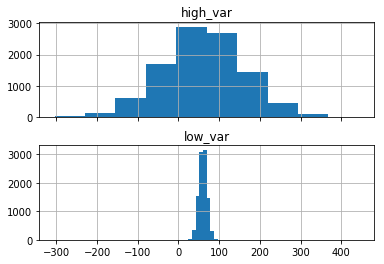

low_var      95.908546
high_var    443.248662
dtype: float64
low_var       6.429858
high_var   -304.370272
dtype: float64


In [19]:
# First, create an empty dataframe to store your variables-to-be.
pop=pd.DataFrame()

# Then create two variables with mean = 60, one with a low standard
# deviation (sd=10) and one with a high standard deviation (sd=100).
pop['low_var']=np.random.normal(60, 10, 10000)
pop['high_var']=np.random.normal(60, 100, 10000)

# Finally, create histograms of the two variables.
pop.hist(layout=(2, 1), sharex=True)
plt.show()

# Calculate and print the maximum and minimum values for each variable.
print(pop.max())
print(pop.min())

The variable with high variance has a much wider range of possible values than the variable with low variance. If these variables represented two populations we wanted to study, we would take samples from each, then generalize from those samples to get information about the populations. Let's try that next.


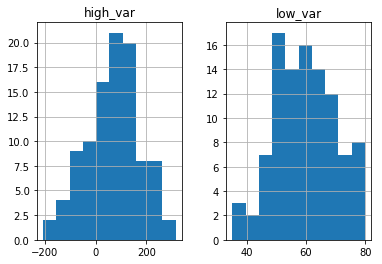

low_var      10.220913
high_var    103.727165
dtype: float64

In [20]:
# Take a random sample of 100 observations from each variable
# and store it in a new dataframe.
sample=pd.DataFrame()
sample['low_var'] = np.random.choice(pop['low_var'], 100)
sample['high_var']=np.random.choice(pop['high_var'], 100)

# Again, visualize the data. Note that here we're using a pandas method to 
# create the histogram.
sample.hist()
plt.show()

# Check how well the sample replicates the population.
sample.mean()
sample.std(ddof=1)

Since the sample is randomly drawn from the population, you can re-run the code as many times as you like and always get a new sample. Try this a few times. You will notice that the low variability samples are closer to the population mean and standard deviation than the high variability samples. Each time a sample is drawn from each population, there is a chance to draw values from the tail ends of the distribution – extremely high values, or extremely low values. Having extreme values in the sample can pull the sample mean away from the population mean. Since the high variability variable has values that are much more extreme than the low variability variable, the estimates have the potential to fall farther from the mean.

Happily, since the extreme values are spread equally across "extremely high" and "extremely low," even multiple samples from a high variability population will eventually converge on the true mean… it will just take a bit longer.

Food for thought: what would happen if you increased the sample size to 1000?

## Summarizing data with Pandas

First let's set up some data and then we'll see how to summarize in Pandas.

In [21]:
import numpy as np
import pandas as pd
%matplotlib inline

# Set up the data
data = pd.DataFrame()
data['gender'] = ['male'] * 100 + ['female'] * 100
data['height'] = np.append(np.random.normal(69, 8, 100), np.random.normal(64, 5, 100))
data['weight'] = np.append(np.random.normal(195, 25, 100), np.random.normal(166, 15, 100))

data.head()

,gender,height,weight
0,male,65.324119,179.269465
1,male,82.637010,202.010251
2,male,78.445387,220.596955
3,male,71.189688,177.413725
4,male,78.214967,172.567830


We've already shown some of the basic tools. We have NumPy methods like `.mean()` or `.std()` to calculate the mean and standard deviation of our data.

In [22]:
data.height.mean()

67.39611041162361

In [23]:
data.height.std()

7.282380591502485

Now, there are many more methods in pandas to describe data in simple aggregative forms. Things like median and variance all have associated pandas methods. As a general rule of thumb, if you're trying to compute a standard statistical measure (the kinds of measures you could find in a statistics book somewhere) Python probably has a coded up method for it somewhere already. Usually that method will be in NumPy and pandas, but not always. It is, however, always worth a quick Google and check of Stack Overflow to see if the work has already been done before you go off and create your own functions.

### The `.describe()` method

So far we've mostly talked about methods with two kinds of output: it either stays the same shape with modified values (the iterative kinds of methods) or it condenses the data into a single value output (aggregative methods). There is another group of methods in Pandas, and they happen to be supremely useful for quickly and coherently summarizing data in a numeric rather than visual way. 

In statistics, there are a lot of descriptive values that are often used in concert with each other. The most classic example is probably mean and standard deviation. Using the two of them together gets you a lot of information about how the data is distributed across values.

Pandas understands this. Sometimes you want more than one value, but less than all of them. You want a set of summary statistics that give you a good, standardized view into the data and its variables. Enter `.describe()`.

In [24]:
data.describe()

,height,weight
count,200.000000,200.000000
mean,67.396110,180.187601
std,7.282381,24.607950
min,45.754360,122.278288
25%,62.848813,163.349877
50%,66.409614,175.339471
75%,71.211195,196.382500
max,85.781717,262.780614


Let's look at what that did. Firstly, it returned a data frame, but not one of the same size or shape that we gave it. Instead it iterated over the columns and created these standard statistical measures for each column possible. We say each column possible because one is missing: Gender. That's because gender is a string, rather than a numeric value. We can't compute the means of strings.

Now, as for the values themselves. Count should be relatively self evident, as should min and max. Mean and std (standard deviation) we've also talked about before. The three percent values are _percentiles_. These values represent cutoff points, below which a certain percentage of the data lies. So, 25% of weights are below 162.82 and so on.

Together, these values give us a decent image of what each of the variables included looks like. We can get a numerical sense of what we might call their "shape". However, this is only one part of `.describe()`'s capabilities. As we covered in the toolkit unit, we can also group our data. This allows us to be even more insightful with our describe, letting us compare the summary statistics for two different groups of our data.

In [25]:
data.groupby('gender').describe()

height                                                                  \
        count       mean       std       min        25%        50%        75%   
gender                                                                          
female  100.0  64.755535  5.064185  51.06508  61.802430  65.062171  67.639673   
male    100.0  70.036686  8.177391  45.75436  65.659508  69.209202  75.733630   

                  weight                                                 \
              max  count        mean        std         min         25%   
gender                                                                    
female  78.504491  100.0  165.702712  14.826478  122.278288  156.386839   
male    85.781717  100.0  194.672490  23.948529  142.606180  178.881893   

                                            
               50%         75%         max  
gender                                      
female  166.890617  173.913627  207.345349  
male    195.163758  206.620476  262.780614

Now we have twice the output. This may not be the easiest form to read it, but it does give us a sense of the difference between the two groups, male and female. In this case we can see that the distributions for height and weight are higher for men than for women, which is what we'd expect. This kind of grouping can give us another layer of insight to our analysis.

### Value Counts

Sometimes, you aren't dealing with data that is best summarized in this form. The most common example of this is strings, where these kinds of methods do not apply. In that case what you're probably interested in is _counts_. Python gives you an easy way to go over a column of data and return the distinct values as well as the counts of each.

In [26]:
data.gender.value_counts()

female    100
male      100
Name: gender, dtype: int64

Now, the first thing to note is that this method is working on `data.gender`, which is a _series_ object rather than a _data frame_ object. This `.value_counts()` method cannot iterate over a whole data frame. Luckily each column and row in a data frame is a series and you can use this method simply by selecting a column as we did above. 

There are several reasons to use this method. Firstly, it gives you another way to make sense of your data. In this case it shows us that our data is evenly balanced between males and females, with one hundred samples of each.

There are plenty of other ways this function could be useful. It can show outliers or possible malformed data. For example, if we were to see something like `'Mal'` with a single entry, we'd have found a typo in the data. This method works over both numerical and object data, though it is not valuable to run over the numeric columns in this example. Can you think of why?

In [27]:
data.weight.value_counts().head()

207.262814    1
166.831244    1
166.998404    1
177.225115    1
166.949989    1
Name: weight, dtype: int64

As you can see, it's not useful because we're dealing with truly continuous random data, so no value is exactly repeated. We simply get a list of all the values with a count of 1 for each.

However, these two methods, `.describe()` and `.value_counts()`, do often provide incredibly easy and valuable insights into your dataset. You'll want to use them throughout the course as one of the ways to get a first, quick sense of the data before digging in more specifically on points of interest.

In [28]:
import numpy as np
import pandas as pd
%matplotlib inline

# Set up the data
data = pd.DataFrame()
data['gender'] = ['male'] * 100 + ['female'] * 100
data['height'] = np.append(np.random.normal(69, 8, 100), np.random.normal(64, 5, 100))
data['weight'] = np.append(np.random.normal(195, 25, 100), np.random.normal(166, 15, 100))

data.head()

,gender,height,weight
0,male,68.673030,202.536360
1,male,71.215466,202.126233
2,male,61.973605,176.748709
3,male,57.266837,200.988887
4,male,75.917402,221.611209
